In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, adjusted_rand_score

# Load data
df = pd.read_csv('ripeness_dataset.csv')
X = df.filter(like='feature_')
y = df['label']

# Preprocess
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply k-means
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_clusters = kmeans.fit_predict(X_scaled)

# Evaluation
# print(f"Adjusted Rand Score: {adjusted_rand_score(y_encoded, predicted_clusters):.2f}")

# # Confusion matrix with class names
# cm = confusion_matrix(y_encoded, predicted_clusters)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', 
#             xticklabels=label_encoder.classes_, 
#             yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted Clusters')
# plt.ylabel('True Classes')
# plt.show()


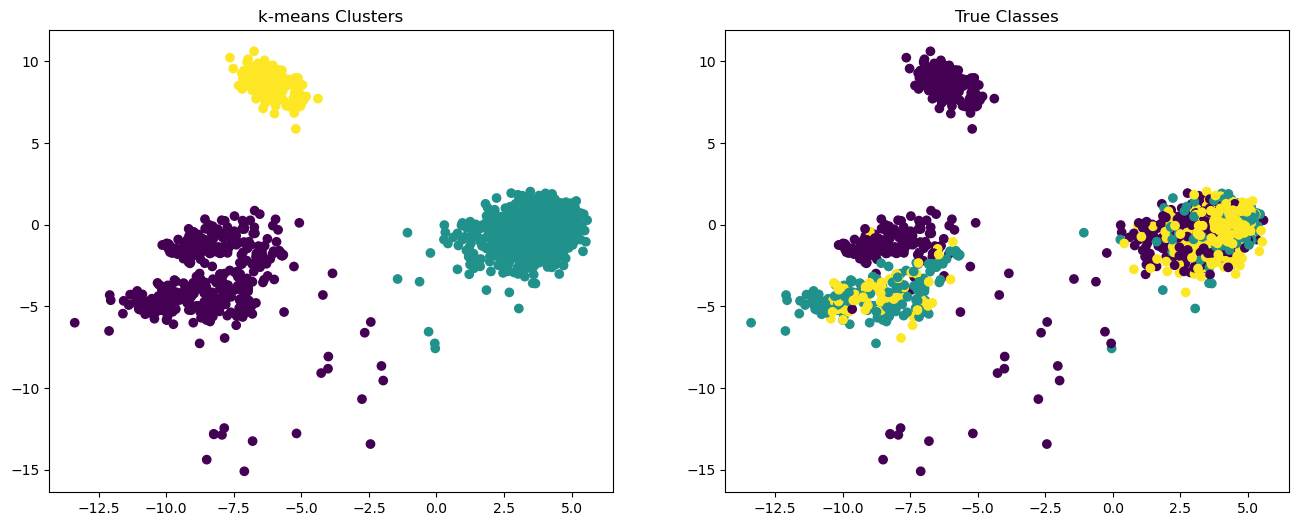

In [6]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters vs true labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Clusters from k-means
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_clusters, cmap='viridis')
ax1.set_title('k-means Clusters')

# True labels
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], cmap='viridis')
ax2.set_title('True Classes')
plt.show()